# Metadata

This exercise seeks to fit **logistic**  and **Support Vector Machine** model to the *Olist e-commerce* dataset. We will develop a base classifier for this model and subsequently tune the hyperparameters for possible improvement to the performance metrics (i.e. Accuracy, Precision, F-Score and Sensitivity).
This modeling phase will utilize the 'clean' dataset that was processed for the visualization task. The **derived** response for the objective is actual delivery duration. Therefore the predictive model will predict actual delivery duration with performance measured on the held out test set. 

In [1]:
# set up environment
import numpy as np
import pandas as pd
import os
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# change working directory
os.chdir(r"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Machine Learning 1\Olist_Dataset")
#"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Machine Learning 1\Olist_Dataset"

# get current working directory
os.getcwd()

'C:\\Users\\olani\\OneDrive\\Documents\\Data Science\\SMU-Data Science\\Machine Learning 1\\Olist_Dataset'

In [3]:
# set up some colors and text attributes to markdown
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
olist = pd.read_csv('olist_clean.csv')
olist.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_state,tot_order_amt,purchase_wk_day,purchase_month,order_delivery_actual_duration,order_delivery_estimated_duration,delivery_estimate_discrepancy,product_dimensions,delivery_est_discrepancy_range,review_score_class
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,...,SP,99.33,Wednesday,April,13,26,13,7803.0,too early,bad
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,...,SP,24.39,Tuesday,June,3,19,16,1056.0,too early,good
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,...,SP,65.71,Tuesday,December,4,20,16,3360.0,too early,good
3,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,14,28,14,3080.0,too early,good
4,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,14,28,14,3080.0,too early,good


In [5]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           114067 non-null  object 
 1   customer_id                        114067 non-null  object 
 2   order_purchase_timestamp           114067 non-null  object 
 3   order_approved_at                  114067 non-null  object 
 4   order_delivered_carrier_date       114067 non-null  object 
 5   order_delivered_customer_date      114067 non-null  object 
 6   order_estimated_delivery_date      114067 non-null  object 
 7   customer_unique_id                 114067 non-null  object 
 8   customer_zip_code_prefix           114067 non-null  int64  
 9   customer_city                      114067 non-null  object 
 10  customer_state                     114067 non-null  object 
 11  review_id                          1140

# 1. Create Model (50 points)

- Create a **logistic regression model** and a **support vector machine model** for the **classification task** involved with your dataset. 
- Assess how well each model performs (use 80/20 training/testing split for your data).

- Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. 
    - That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines.
            -For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe.

In [6]:
#Create a working dataframe from the copy of original
import copy
olist_class = copy.deepcopy(olist)
olist_class.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_state,tot_order_amt,purchase_wk_day,purchase_month,order_delivery_actual_duration,order_delivery_estimated_duration,delivery_estimate_discrepancy,product_dimensions,delivery_est_discrepancy_range,review_score_class
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,...,SP,99.33,Wednesday,April,13,26,13,7803.0,too early,bad
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,...,SP,24.39,Tuesday,June,3,19,16,1056.0,too early,good
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,...,SP,65.71,Tuesday,December,4,20,16,3360.0,too early,good
3,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,14,28,14,3080.0,too early,good
4,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,14,28,14,3080.0,too early,good


In [7]:
#Modify datatypes
#changing attributes data types
continuous_features = ['price','freight_value', 'payment_sequential','payment_installments','payment_value',
                      'product_name_lenght','product_description_lenght', 'product_photos_qty','product_weight_g',
                      'product_length_cm','product_height_cm','product_width_cm', 'review_score',
                       'order_delivery_actual_duration', 'order_delivery_estimated_duration',
                       'delivery_estimate_discrepancy', 'product_dimensions', 'tot_order_amt'] 

cat_features = ['customer_city', 'customer_state', 'customer_zip_code_prefix', 'seller_zip_code_prefix', 
                'seller_city', 'seller_state', 'product_category_english','review_id',
               'review_comment_title','review_comment_message','payment_type',
               'order_item_id', 'product_id','seller_id','order_id', 'customer_id', 'purchase_wk_day', 'purchase_month',
               'delivery_est_discrepancy_range', 'review_score_class', 'customer_unique_id'] 

date_features = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                 'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp'] 



In [8]:
# use the "astype" function to change the variable type
olist_class[continuous_features] = olist_class.copy()[continuous_features].astype(np.float64)
olist_class[cat_features] = olist_class.copy()[cat_features].astype("category")
#olist_class[date_features] = pd.to_datetime(olist_class.copy()[date_features])
olist_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   order_id                           114067 non-null  category
 1   customer_id                        114067 non-null  category
 2   order_purchase_timestamp           114067 non-null  object  
 3   order_approved_at                  114067 non-null  object  
 4   order_delivered_carrier_date       114067 non-null  object  
 5   order_delivered_customer_date      114067 non-null  object  
 6   order_estimated_delivery_date      114067 non-null  object  
 7   customer_unique_id                 114067 non-null  category
 8   customer_zip_code_prefix           114067 non-null  category
 9   customer_city                      114067 non-null  category
 10  customer_state                     114067 non-null  category
 11  review_id                 

In [9]:
# fix dates
for i in date_features:
    olist_class.loc[:,i] = pd.to_datetime(olist_class.copy().loc[:,i], errors="coerce")

In [10]:
olist_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   order_id                           114067 non-null  category      
 1   customer_id                        114067 non-null  category      
 2   order_purchase_timestamp           114067 non-null  datetime64[ns]
 3   order_approved_at                  114067 non-null  datetime64[ns]
 4   order_delivered_carrier_date       114067 non-null  datetime64[ns]
 5   order_delivered_customer_date      114067 non-null  datetime64[ns]
 6   order_estimated_delivery_date      114067 non-null  datetime64[ns]
 7   customer_unique_id                 114067 non-null  category      
 8   customer_zip_code_prefix           114067 non-null  category      
 9   customer_city                      114067 non-null  category      
 10  customer_state      

Text(0.5, 1.0, 'Distribution of Discrepancy')

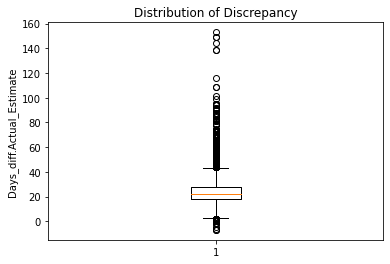

In [11]:
plt.boxplot(x=olist.order_delivery_estimated_duration)
plt.ylabel('Days_diff.Actual_Estimate')
plt.title('Distribution of Discrepancy') #labels

In [12]:
olist.copy()['order_delivery_estimated_duration'].quantile(0.95)

38.0

In [13]:
estimate_delivery = []
estimate_delivery_out = []

thresh = np.quantile(olist.copy()['order_delivery_estimated_duration'], 0.95)
[estimate_delivery.append(i)
 if abs(i) <= thresh else estimate_delivery_out.append(i)
 for i in olist.copy()['order_delivery_estimated_duration']]
#y = np.array(y)

len(estimate_delivery), len(estimate_delivery_out), (len(estimate_delivery)/olist.shape[0])


(108875, 5192, 0.9544828916338643)

Text(0.5, 1.0, 'Distribution of Discrepancy')

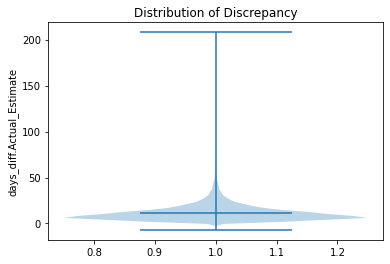

In [14]:
plt.violinplot(olist.order_delivery_actual_duration, showmeans=True)
plt.ylabel('days_diff.Actual_Estimate')
plt.title('Distribution of Discrepancy') #labels

In [15]:
olist_class2 = olist_class[['payment_sequential', 'product_category_english', 
                            'seller_zip_code_prefix','seller_city', 'tot_order_amt', 
                            'freight_value', 'product_dimensions', 'review_score_class', 'product_weight_g', 'customer_city',
                            'customer_zip_code_prefix','order_approved_at', 'order_delivery_actual_duration']]
olist_class2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   payment_sequential              114067 non-null  float64       
 1   product_category_english        114067 non-null  category      
 2   seller_zip_code_prefix          114067 non-null  category      
 3   seller_city                     114067 non-null  category      
 4   tot_order_amt                   114067 non-null  float64       
 5   freight_value                   114067 non-null  float64       
 6   product_dimensions              114066 non-null  float64       
 7   review_score_class              114067 non-null  category      
 8   product_weight_g                114066 non-null  float64       
 9   customer_city                   114067 non-null  category      
 10  customer_zip_code_prefix        114067 non-null  categor

In [16]:
olist_class2.dropna(inplace=True)

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
olist_class2.shape, olist_class2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114066 entries, 0 to 114066
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   payment_sequential              114066 non-null  float64       
 1   product_category_english        114066 non-null  category      
 2   seller_zip_code_prefix          114066 non-null  category      
 3   seller_city                     114066 non-null  category      
 4   tot_order_amt                   114066 non-null  float64       
 5   freight_value                   114066 non-null  float64       
 6   product_dimensions              114066 non-null  float64       
 7   review_score_class              114066 non-null  category      
 8   product_weight_g                114066 non-null  float64       
 9   customer_city                   114066 non-null  category      
 10  customer_zip_code_prefix        114066 non-null  categor

((114066, 13), None)

In [18]:
#olist_class2.loc[olist_class2.order_delivery_actual_duration > 50, ('order_delivery_actual_duration')]= np.NaN
olist_class2.head()

,payment_sequential,product_category_english,seller_zip_code_prefix,seller_city,tot_order_amt,freight_value,product_dimensions,review_score_class,product_weight_g,customer_city,customer_zip_code_prefix,order_approved_at,order_delivery_actual_duration
0,1.0,home_construction,13321.0,salto,99.33,19.53,7803.0,bad,800.0,teofilo otoni,39801,2018-04-25 22:15:09,13.0
1,1.0,auto,4660.0,sao paulo,24.39,7.39,1056.0,good,150.0,sao paulo,2422,2018-06-26 11:18:58,3.0
2,1.0,perfumery,9015.0,santo andre,65.71,8.72,3360.0,good,250.0,sao paulo,2652,2017-12-14 09:52:34,4.0
3,1.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14.0
4,1.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14.0


In [19]:
for i in olist_class2:
    print('Unique value counts for ' + i + ' attribute is: =', olist_class2[i].nunique())

Unique value counts for payment_sequential attribute is: = 26
Unique value counts for product_category_english attribute is: = 73
Unique value counts for seller_zip_code_prefix attribute is: = 2136
Unique value counts for seller_city attribute is: = 588
Unique value counts for tot_order_amt attribute is: = 26460
Unique value counts for freight_value attribute is: = 6902
Unique value counts for product_dimensions attribute is: = 4416
Unique value counts for review_score_class attribute is: = 3
Unique value counts for product_weight_g attribute is: = 2167
Unique value counts for customer_city attribute is: = 4073
Unique value counts for customer_zip_code_prefix attribute is: = 14844
Unique value counts for order_approved_at attribute is: = 87124
Unique value counts for order_delivery_actual_duration attribute is: = 147


In [20]:
#review class is an important attribut 
#but with class imbalance so we split the dataset 
#to ensure that samples are representatinve of the class levels
olist_class2['review_score_class'].value_counts()

good    87129
bad     17295
fair     9642
Name: review_score_class, dtype: int64

In [21]:
olist_class2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114066 entries, 0 to 114066
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   payment_sequential              114066 non-null  float64       
 1   product_category_english        114066 non-null  category      
 2   seller_zip_code_prefix          114066 non-null  category      
 3   seller_city                     114066 non-null  category      
 4   tot_order_amt                   114066 non-null  float64       
 5   freight_value                   114066 non-null  float64       
 6   product_dimensions              114066 non-null  float64       
 7   review_score_class              114066 non-null  category      
 8   product_weight_g                114066 non-null  float64       
 9   customer_city                   114066 non-null  category      
 10  customer_zip_code_prefix        114066 non-null  categor

In [22]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [23]:
#Simple train test split

from sklearn.model_selection import train_test_split
olist_train, olist_test = train_test_split(olist_class2, test_size=0.2,random_state=100)

In [24]:
olist_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91252 entries, 18821 to 38408
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   payment_sequential              91252 non-null  float64       
 1   product_category_english        91252 non-null  category      
 2   seller_zip_code_prefix          91252 non-null  category      
 3   seller_city                     91252 non-null  category      
 4   tot_order_amt                   91252 non-null  float64       
 5   freight_value                   91252 non-null  float64       
 6   product_dimensions              91252 non-null  float64       
 7   review_score_class              91252 non-null  category      
 8   product_weight_g                91252 non-null  float64       
 9   customer_city                   91252 non-null  category      
 10  customer_zip_code_prefix        91252 non-null  category      
 11

In [25]:
olist_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22814 entries, 74667 to 35877
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   payment_sequential              22814 non-null  float64       
 1   product_category_english        22814 non-null  category      
 2   seller_zip_code_prefix          22814 non-null  category      
 3   seller_city                     22814 non-null  category      
 4   tot_order_amt                   22814 non-null  float64       
 5   freight_value                   22814 non-null  float64       
 6   product_dimensions              22814 non-null  float64       
 7   review_score_class              22814 non-null  category      
 8   product_weight_g                22814 non-null  float64       
 9   customer_city                   22814 non-null  category      
 10  customer_zip_code_prefix        22814 non-null  category      
 11

In [26]:
#Target variable
olist_train_y = olist_train.order_delivery_actual_duration
len(olist_train_y)

91252

In [27]:
#All predictor attributes
olist_train_noY = olist_train.copy().drop('order_delivery_actual_duration', axis=1)
olist_train_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91252 entries, 18821 to 38408
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   payment_sequential        91252 non-null  float64       
 1   product_category_english  91252 non-null  category      
 2   seller_zip_code_prefix    91252 non-null  category      
 3   seller_city               91252 non-null  category      
 4   tot_order_amt             91252 non-null  float64       
 5   freight_value             91252 non-null  float64       
 6   product_dimensions        91252 non-null  float64       
 7   review_score_class        91252 non-null  category      
 8   product_weight_g          91252 non-null  float64       
 9   customer_city             91252 non-null  category      
 10  customer_zip_code_prefix  91252 non-null  category      
 11  order_approved_at         91252 non-null  datetime64[ns]
dtypes: category(6)

### Preprocess the test for prediction

In [28]:
#All predictor attributes
olist_test_noY = olist_test.copy().drop('order_delivery_actual_duration', axis=1)
olist_test_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22814 entries, 74667 to 35877
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   payment_sequential        22814 non-null  float64       
 1   product_category_english  22814 non-null  category      
 2   seller_zip_code_prefix    22814 non-null  category      
 3   seller_city               22814 non-null  category      
 4   tot_order_amt             22814 non-null  float64       
 5   freight_value             22814 non-null  float64       
 6   product_dimensions        22814 non-null  float64       
 7   review_score_class        22814 non-null  category      
 8   product_weight_g          22814 non-null  float64       
 9   customer_city             22814 non-null  category      
 10  customer_zip_code_prefix  22814 non-null  category      
 11  order_approved_at         22814 non-null  datetime64[ns]
dtypes: category(6)

In [29]:
#Target variable
olist_test_y = olist_test.order_delivery_actual_duration
len(olist_test_y)

22814

### Advanced linear model
https://www.kaggle.com/kylegilde/building-columntransformers-dynamically

In [30]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
import multiprocessing
from sklearn.impute import SimpleImputer

listing 79 features in the code or a configuration file seems is a tedious and unnecessary task. What if there was a way to logically bucket these features by their characteristics?

The key insight that allows you to dynamically construct a ColumnTransformer is understanding that there are 3 broad types of features in non-textual, non-time series datasets:

- numerical
- categorical with moderate-to-low cardinality
- categorical with high cardinality

In [31]:
#select features with logical conditions instead of listing every single column in the code
select_numeric_features = make_column_selector(dtype_include=np.number)
numeric_features = select_numeric_features(olist_train_noY)
print(f'N numeric_features: {len(numeric_features)} \n')
print(', '.join(numeric_features))

N numeric_features: 5 

payment_sequential, tot_order_amt, freight_value, product_dimensions, product_weight_g


#### Categorical  with moderate-to-low cardinality

One-hot (OH) encoding, where an indicator column is created for each unique value, is the most common method. However, the OH transformation may not be suitable for features with high cardinality. OH encoding features with many unique values may create too many columns with very low variance, which may take up too much memory or have a negative impact on the performance of linear models. Hence, we may want to limit the features we select for this encoding to ones below a certain threshold of unique values. 

Since the *make_column_selector* isn't capable of detecting cardinality, I've developed my own *select_oh_features* custom function. It consists of a piping of pandas methods that do the following:

- Selects the object and category dtypes from the pandas DataFrame

- Counts the number of unique values for those columns

- Subsets the unique value counts if they are less than or equal to MAX_OH_CARDINALITY using an anonymous lambda function within the loc method

- Extracts the column names from the index and returns them as a list

In [32]:
MAX_OH_CARDINALITY = 10

def select_oh_features(df):
    
    hc_features =\
        df\
        .select_dtypes(['object', 'category'])\
        .apply(lambda col: col.nunique())\
        .loc[lambda x: x <= MAX_OH_CARDINALITY]\
        .index\
        .tolist()
        
    return hc_features

oh_features = select_oh_features(olist_train_noY)

print(f'N oh_features: {len(oh_features)} \n')
print(', '.join(oh_features))

N oh_features: 1 

review_score_class


In [33]:
#oh_pipeline = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder(handle_unknown='ignore'))

In [34]:
#Try without imputer
oh_pipeline1 = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

#### Categorical with high cardinality
To select the features with high cardinality, I've created a similar function that selects the object and category features with unique value counts greater than the threshold. It selects three features that meet these criteria.

#### Categorical with high cardinality
To select the features with high cardinality, I've created a similar function that selects the object and category features with unique value counts greater than the threshold. It selects three features that meet these criteria.

In [35]:
def select_hc_features(df):
    
    hc_features =\
        df\
        .select_dtypes(['object', 'category'])\
        .apply(lambda col: col.nunique())\
        .loc[lambda x: x > MAX_OH_CARDINALITY]\
        .index\
        .tolist()
        
    return hc_features


hc_features = select_hc_features(olist_train_noY)

print(f'N hc_features: {len(hc_features)} \n')
print(', '.join(hc_features))

N hc_features: 5 

product_category_english, seller_zip_code_prefix, seller_city, customer_city, customer_zip_code_prefix


#### Generalized Linear Mixed Model Encoder

To transform our features with high cardinality, I could have gone with a more basic approach and used Scikit-Learn's native LabelEncoder or OrdinalEncoder preprocessor. However, in many cases, these methods are likely to perform suboptimally in your model unless you are dealing with ordinal data. I prefer to use the Category Encoder package, which has more than a dozen ways of intelligently encoding highly cardinal features. This post provides an overview of several of these methods. Most of these are supervised techniques, which use the dependent variable to transform the nominal values into numerical ones. The TargetEncoder is probably the easiest method to understand, but I prefer to use the Generalized Linear Mixed Model Encoder, which has "solid statistical theory behind [it]" and "no hyperparameters to tune." Without diving into the details of GLMMs, at its core, this method encodes the nominal values as the coefficents from a one-hot-encoded linear model. The Category Encoder methods handle missing and unknown values by setting them to zero or the mean of the dependent variable. 

In [36]:
import category_encoders as ce
hc_pipeline = make_pipeline(ce.GLMMEncoder())

In [37]:
numeric_pipeline = make_pipeline(StandardScaler()) 

In [38]:
column_transformer = ColumnTransformer(transformers=\
                                       [('numeric_pipeline', numeric_pipeline, select_numeric_features),\
                                        ('oh_pipeline', oh_pipeline1, select_oh_features),\
                                        ('hc_pipeline', hc_pipeline, select_hc_features)],                                       
                                       remainder='drop')

In [39]:
# let's break up the Discrepancy variable
#But needs outliers to be removed
olist_train_y_class = pd.cut(olist_train_y, [0, 2, 3, 5], 3, labels=['bad','fair','good']) # this creates a new variable
olist_train_y_class = olist_train_y_class.astype("category")

In [40]:
olist_train_y.describe()

count    91252.000000
mean        11.566453
std          9.415850
min         -6.000000
25%          6.000000
50%          9.000000
75%         15.000000
max        208.000000
Name: order_delivery_actual_duration, dtype: float64

In [41]:
olist_train_y.quantile(0.95)

28.0

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a7af434ac8>],
 'cmeans': <matplotlib.collections.LineCollection at 0x1a7af096988>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a7af4609c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a7af460a88>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a7af439448>}

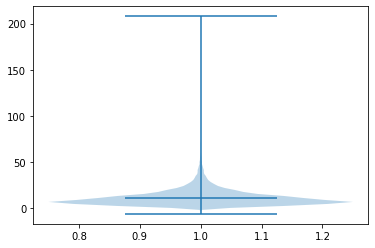

In [42]:
plt.violinplot(olist_train_y, showmeans=True)

In [43]:
olist_train_y_range = pd.cut(olist_train_y, [-7, -4, 4, 210], 3, labels=[1,2,3]) # this creates a new variable
olist_train_y_range.describe()
#'late' = 1,'on target' = 2, 'early' = 3

count     91252
unique        3
top           3
freq      76591
Name: order_delivery_actual_duration, dtype: int64

In [44]:
olist_train_y_range.isna().sum()

0

In [45]:
olist_test_y_range = pd.cut(olist_test_y, [-10, -4, 4, 250], 3, labels=[1,2,3]) # this creates a new variable
olist_test_y_range.describe()
#'late' = 1,'on target' = 2, 'early' = 3

count     22814
unique        3
top           3
freq      19115
Name: order_delivery_actual_duration, dtype: int64

In [46]:
olist_test_y_range.isna().sum()

0

In [47]:
#Make Y classification
X_train_class = column_transformer.fit_transform(olist_train_noY, olist_train_y_range)
X_test_class = column_transformer.transform(olist_test_noY)

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [48]:
print(X_train_class.shape)
print(X_test_class.shape)

(91252, 13)
(22814, 13)


#### Classification

In [49]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_class,olist_train_y_range)

SGDClassifier(random_state=42)

In [50]:
#y_train_pred_class = sgd_clf.predict(X_train_class)
y_test_pred_class = sgd_clf.predict(X_test_class)

In [51]:
#Logitstic regression
logr_clf = LogisticRegression(penalty='l2', C=0.05, class_weight='balanced', solver='saga', 
                              multi_class='multinomial', random_state=42) # get object
logr_clf.fit(X_train_class,olist_train_y_range)

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.05, class_weight='balanced', multi_class='multinomial',
                   random_state=42, solver='saga')

In [52]:
#y_train_pred_class = sgd_clf.predict(X_train_class)
y_test_pred_class_lr = logr_clf.predict(X_test_class)

In [53]:
#Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [54]:
#Train-test log R, accuracy
accuracy_score(olist_test_y_range, y_test_pred_class_lr)

0.8026211975103007

In [55]:
#Train-test log R
precision_recall_fscore_support(olist_test_y_range, y_test_pred_class_lr, average='weighted')

(0.8549719148586454, 0.8026211975103007, 0.8278851913220535, None)

## 2. Model Advantages (10 points)
Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

- Accuracy increased significantly when I reduced the C value from 1 to 0.05.
- There was no significant changes when I reduced it to 0.5


# 3. Interpret Feature Importance (30 points)

- Use the weights from logistic regression to interpret the importance of different features for the classification task.
- Explain your interpretation in detail. Why do you think some variables are more important?

In [56]:
# iterate over the coefficients
weights = logr_clf.coef_.T # take transpose to make a column vector
variable_names = olist_train_noY.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', abs(coef[0]))

payment_sequential has weight of 4.243448321628572
product_category_english has weight of 1.8591376956025227
seller_zip_code_prefix has weight of 4.381987377964206
seller_city has weight of 3.442363627194232
tot_order_amt has weight of 0.48733531969733673
freight_value has weight of 5.6510156508139735
product_dimensions has weight of 4.833067239100825
review_score_class has weight of 1.8346118185199196
product_weight_g has weight of 1.1291339392075246
customer_city has weight of 2.405648251563817
customer_zip_code_prefix has weight of 0.2865371783410793
order_approved_at has weight of 6.872611289118597


# 4. Interpret support vectors

- Look at the chosen support vectors for the classification task. 
- Do these provide any insight into the data? Explain. 
- If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model
    - then analyze the support vectors from the subsampled dataset.